## Matt's WeRateDogs Twitter data wrangling project - Jan 2019

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import json
from timeit import default_timer as timer
# to query twitter api
import tweepy
import matplotlib.pyplot as plt
% matplotlib inline

### Gather Data

In [3]:
# import WeRateDogs Twitter archive file to a df
twitArchEnhanc = pd.read_csv('twitter-archive-enhanced.csv')
# check
twitArchEnhanc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
# importing image_predictions.tsv file from Udacity server to a df
# Make directory (in orange circle icon in this notebook) if it doesn't already exist
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split("/")[-1]), mode='wb') as file:
    file.write(response.content)
# check
os.listdir(folder_name)
imgPredict = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
imgPredict.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [92]:
# authentication credentials for querying twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

# create API object for gathering Twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# querying all the tweets in this db may take 20-30 mins bc of Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# establish dictionaries to convert to DataFrame later
count = 0
fails_dict = {}
tweet_ids = twitArchEnhanc.tweet_id.values

# write each tweetID's JSON data to a new line in txt file
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for id_of_tweet in tweet_ids:
        try:
            # This cell is slow so print ranking and tweet id to gauge time remaining        
            count += 1
            print(str(count) + " " + str(id_of_tweet))
            # extended provides non-truncated tweet text
            tweet = api.get_status(id_of_tweet, tweet_mode='extended')
            # status object of tweepy itself is not JSON serializable, but it has a
            # _json property which contains JSON serializable response data
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(str(count) + " " + str(id_of_tweet) + ": " + str(e))
            fails_dict[id_of_tweet] = e
end = timer()
print(end - start)
print(fails_dict)

1 892420643555336193
2 892177421306343426
3 891815181378084864
4 891689557279858688
5 891327558926688256
6 891087950875897856
7 890971913173991426
8 890729181411237888
9 890609185150312448
10 890240255349198849
11 890006608113172480
12 889880896479866881
13 889665388333682689
14 889638837579907072
15 889531135344209921
16 889278841981685760
17 888917238123831296
18 888804989199671297
19 888554962724278272
20 888202515573088257
20 888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
21 888078434458587136
22 887705289381826560
23 887517139158093824
24 887473957103951883
25 887343217045368832
26 887101392804085760
27 886983233522544640
28 886736880519319552
29 886680336477933568
30 886366144734445568
31 886267009285017600
32 886258384151887873
33 886054160059072513
34 885984800019947520
35 885528943205470208
36 885518971528720385
37 885311592912609280
38 885167619883638784
39 884925521741709313
40 884876753390489601
41 884562892145688576
42 884441805382717440
43

331 833124694597443584
332 832998151111966721
333 832769181346996225
334 832757312314028032
335 832682457690300417
336 832645525019123713
337 832636094638288896
338 832397543355072512
339 832369877331693569
340 832273440279240704
341 832215909146226688
342 832215726631055365
343 832088576586297345
344 832040443403784192
345 832032802820481025
346 831939777352105988
347 831926988323639298
348 831911600680497154
349 831670449226514432
350 831650051525054464
351 831552930092285952
352 831322785565769729
353 831315979191906304
354 831309418084069378
355 831262627380748289
356 830956169170665475
357 830583320585068544
358 830173239259324417
359 830097400375152640
360 829878982036299777
361 829861396166877184
362 829501995190984704
363 829449946868879360
364 829374341691346946
365 829141528400556032
366 829011960981237760
367 828801551087042563
368 828770345708580865
369 828708714936930305
370 828650029636317184
371 828409743546925057
372 828408677031882754
373 828381636999917570
374 8283765

677 789314372632018944
678 789280767834746880
679 789268448748703744
680 789137962068021249
681 788908386943430656
682 788765914992902144
683 788552643979468800
684 788412144018661376
685 788178268662984705
686 788150585577050112
687 788070120937619456
688 788039637453406209
689 787810552592695296
690 787717603741622272
691 787397959788929025
692 787322443945877504
693 787111942498508800
694 786963064373534720
695 786729988674449408
696 786709082849828864
697 786664955043049472
698 786595970293370880
699 786363235746385920
700 786286427768250368
701 786233965241827333
702 786051337297522688
703 786036967502913536
704 785927819176054784
705 785872687017132033
706 785639753186217984
707 785533386513321988
708 785515384317313025
709 785264754247995392
710 785170936622350336
711 784826020293709826
712 784517518371221505
713 784431430411685888
714 784183165795655680
715 784057939640352768
716 783839966405230592
717 783821107061198850
718 783695101801398276
719 783466772167098368
720 7833917

1020 746790600704425984
1021 746757706116112384
1022 746726898085036033
1023 746542875601690625
1024 746521445350707200
1025 746507379341139972
1026 746369468511756288
1027 746131877086527488
1028 746056683365994496
1029 745789745784041472
1030 745712589599014916
1031 745433870967832576
1032 745422732645535745
1033 745314880350101504
1034 745074613265149952
1035 745057283344719872
1036 744995568523612160
1037 744971049620602880
1038 744709971296780288
1039 744334592493166593
1040 744234799360020481
1041 744223424764059648
1042 743980027717509120
1043 743895849529389061
1044 743835915802583040
1045 743609206067040256
1046 743595368194129920
1047 743545585370791937
1048 743510151680958465
1049 743253157753532416
1050 743222593470234624
1051 743210557239623680
1052 742534281772302336
1053 742528092657332225
1054 742465774154047488
1055 742423170473463808
1056 742385895052087300
1057 742161199639494656
1058 742150209887731712
1059 741793263812808706
1060 741743634094141440
1061 74143825966

1362 703079050210877440
1363 703041949650034688
1364 702932127499816960
1365 702899151802126337
1366 702684942141153280
1367 702671118226825216
1368 702598099714314240
1369 702539513671897089
1370 702332542343577600
1371 702321140488925184
1372 702276748847800320
1373 702217446468493312
1374 701981390485725185
1375 701952816642965504
1376 701889187134500865
1377 701805642395348998
1378 701601587219795968
1379 701570477911896070
1380 701545186879471618
1381 701214700881756160
1382 700890391244103680
1383 700864154249383937
1384 700847567345688576
1385 700796979434098688
1386 700747788515020802
1387 700518061187723268
1388 700505138482569216
1389 700462010979500032
1390 700167517596164096
1391 700151421916807169
1392 700143752053182464
1393 700062718104104960
1394 700029284593901568
1395 700002074055016451
1396 699801817392291840
1397 699788877217865730
1398 699779630832685056
1399 699775878809702401
1400 699691744225525762
1401 699446877801091073
1402 699434518667751424
1403 69942367184

1702 680940246314430465
1703 680934982542561280
1704 680913438424612864
1705 680889648562991104
1706 680836378243002368
1707 680805554198020098
1708 680801747103793152
1709 680798457301471234
1710 680609293079592961
1711 680583894916304897
1712 680497766108381184
1713 680494726643068929
1714 680473011644985345
1715 680440374763077632
1716 680221482581123072
1717 680206703334408192
1718 680191257256136705
1719 680176173301628928
1720 680161097740095489
1721 680145970311643136
1722 680130881361686529
1723 680115823365742593
1724 680100725817409536
1725 680085611152338944
1726 680070545539371008
1727 680055455951884288
1727 680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]
1728 679877062409191424
1729 679872969355714560
1730 679862121895714818
1731 679854723806179328
1732 679844490799091713
1733 679828447187857408
1734 679777920601223168
1735 679736210798047232
1736 679729593985699840
1737 679722016581222400
1738 679530280114372609
1739 679527802031484928
174

2041 671544874165002241
2042 671542985629241344
2043 671538301157904385
2044 671536543010570240
2045 671533943490011136
2046 671528761649688577
2047 671520732782923777
2048 671518598289059840
2049 671511350426865664
2050 671504605491109889
2051 671497587707535361
2052 671488513339211776
2053 671486386088865792
2054 671485057807351808
2055 671390180817915904
2056 671362598324076544
2057 671357843010908160
2058 671355857343524864
2059 671347597085433856
2060 671186162933985280
2061 671182547775299584
2062 671166507850801152
2063 671163268581498880
2064 671159727754231808
2065 671154572044468225
2066 671151324042559489
2067 671147085991960577
2068 671141549288370177
2069 671138694582165504
2070 671134062904504320
2071 671122204919246848
2072 671115716440031232
2073 671109016219725825
2074 670995969505435648
2075 670842764863651840
2076 670840546554966016
2077 670838202509447168
2078 670833812859932673
2079 670832455012716544
2080 670826280409919488
2081 670823764196741120
2082 67082270959

In [5]:
# read above tweet_json.txt file line-by-line into a list with (at minimum)
# tweet ID, retweet count, and favorite count
import json
data = []
df_list = []
count = 0
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        obj = json.loads(line)
        tid = obj['id']
        rtc = obj['retweet_count']
        favc = obj['favorite_count']
        df_list.append({'tweet_id': tid,
                        'retweet_count': rtc,
                        'favorite_count': favc})
# check
df_list[:15]

[{'tweet_id': 892420643555336193,
  'retweet_count': 8313,
  'favorite_count': 38017},
 {'tweet_id': 892177421306343426,
  'retweet_count': 6142,
  'favorite_count': 32636},
 {'tweet_id': 891815181378084864,
  'retweet_count': 4066,
  'favorite_count': 24560},
 {'tweet_id': 891689557279858688,
  'retweet_count': 8459,
  'favorite_count': 41369},
 {'tweet_id': 891327558926688256,
  'retweet_count': 9158,
  'favorite_count': 39548},
 {'tweet_id': 891087950875897856,
  'retweet_count': 3048,
  'favorite_count': 19862},
 {'tweet_id': 890971913173991426,
  'retweet_count': 2019,
  'favorite_count': 11615},
 {'tweet_id': 890729181411237888,
  'retweet_count': 18443,
  'favorite_count': 64147},
 {'tweet_id': 890609185150312448,
  'retweet_count': 4182,
  'favorite_count': 27290},
 {'tweet_id': 890240255349198849,
  'retweet_count': 7213,
  'favorite_count': 31307},
 {'tweet_id': 890006608113172480,
  'retweet_count': 7171,
  'favorite_count': 30084},
 {'tweet_id': 889880896479866881,
  'retwe

In [6]:
# Create DataFrame from list of dictionaries above
count_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
# check
count_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8313,38017
1,892177421306343426,6142,32636
2,891815181378084864,4066,24560
3,891689557279858688,8459,41369
4,891327558926688256,9158,39548


## Assess Data

We will visually and programmatically assess each of the three datasets we've gathered thus far:<br>
1) WeRateDogs Twitter archive file (in twitArchEnhanc df)<br>
2) image_predictions.tsv file (in imgPredict df)<br>
3) Additional tweet count info (in count_df)<br>

In [7]:
# visual assessments
twitArchEnhanc.head(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


From above enhanced twitter archive df sample, we see a few issues:<br><br>
**Quality**<br>
- Some name entries say 'None'. We would want to standardize and make these NaN.<br>
- There appear to be a lot of blank data points for fields such as in_reply_to_status_id. We likely don't need these columns for our rudimentary analysis, so we can drop them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).<br>

**Tidiness**<br>
- Dog Type could be captured as one category data column instead of having multiple [boolean] (Doggo, Puppo, etc) columns. We could use the melt function to restructure this.

In [8]:
imgPredict.head(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


From above imgPredict df sample, we see:<br><br>
**Quality**<br>
- Nothing actually stands out from a quick visual assessment. I do see that some dog breeds (in p1, p2, p3 columns) are capitalized whereas others are all lowercase. We would want to turn to programmatic assessment (value_counts) to see if there is any cleaning to be done there.<br>

In [9]:
count_df.sample(5)

,tweet_id,retweet_count,favorite_count
1102,732375214819057664,2687,8445
1733,679047485189439488,724,2348
2280,667090893657276420,129,334
1223,712097430750289920,1099,3958
43,883838122936631299,3376,21494


As we just created this tweet_count df via the twitter api call, we don't see anything specifically off from visual assessment. We will examine data types next to ensure counts are integers to aid potential further analysis.<br><br>
**Tidiness**<br>
- All of these observations relate to tweets, as a base unit. Following the tidiness rule that 'every observational unit forms a table', we would want to merge all three datasets into one, using tweet_id as the key.

In [10]:
# programmatic
twitArchEnhanc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

_Some notes from the Project Motivation (instructions):_<br>
- "ratings probably aren't all correct. Same goes for the dog names and probably dog stages. You'll need to assess and clean these columns if you want to use them for analysis and visualization."<br>
- "The fact that the rating numerators are greater than the denominators does not need to be cleaned."

In [11]:
# ok, numerators don't need to be changed, but let's check a few denominators
twitArchEnhanc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# show full text string, not truncated, so we can understand how the scores were derived
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
# check the text of tweet to confirm abnormal denominator
twitArchEnhanc[twitArchEnhanc.rating_denominator == 7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


**Quality**<br>
Looks like the original data mistakenly took 24/7 (reference to hours) as the dog's score here. This is incorrect, although no other score was provided. We can purge this numerator/denominator pair in our cleaning.

In [13]:
# we'll check a couple more
twitArchEnhanc[twitArchEnhanc.rating_denominator == 80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None


In [14]:
# Denominator= 80 looks good. Checking 20.
twitArchEnhanc[twitArchEnhanc.rating_denominator == 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


**Quality**<br>
- Looks like the first tweet has the score mistakenly recorded. 4/20 was in reference to pot day. The score should be 13/10. We are manually correcting a few of these, but if we wanted to try to improve the score parsing programmatically, I would want to perform _look-back_ string parsing (upon review so far, it seems the dog scores show up at _the end_ of tweets, not the beginning)<br>
- The second tweet here also mistakenly took the score to be 4/20, but reading the text, there isn't another score listed. We will NaN these ratings.

In [15]:
# moving to assessing dog names
twitArchEnhanc.name.value_counts()

None        745
a           55 
Charlie     12 
Oliver      11 
Cooper      11 
Lucy        11 
Penny       10 
Lola        10 
Tucker      10 
Bo          9  
Winston     9  
the         8  
Sadie       8  
Toby        7  
Bailey      7  
an          7  
Buddy       7  
Daisy       7  
Bella       6  
Koda        6  
Stanley     6  
Scout       6  
Jax         6  
Oscar       6  
Leo         6  
Jack        6  
Rusty       6  
Dave        6  
Milo        6  
Sammy       5  
           ..  
Shawwn      1  
Flash       1  
my          1  
Cedrick     1  
Geno        1  
Socks       1  
Glenn       1  
Apollo      1  
Cilantro    1  
Zeek        1  
Kayla       1  
Mosby       1  
Superpup    1  
Brian       1  
Blakely     1  
Tebow       1  
Bobbay      1  
Clyde       1  
Crouton     1  
Spark       1  
Monster     1  
Opie        1  
Mike        1  
Eleanor     1  
Tanner      1  
Ralphson    1  
Ralphé      1  
Richie      1  
Horace      1  
Mark        1  
Name: name, Length: 957,

**Quality**<br>
- Looks like there are a few name issues. Most notably, 745 entries have 'None' for dog name. Following database best practices, we'd want to null out these values so that we can reliably draw out how many dog names are missing.
- 55 dogs have the name 'a'. This seems incorrect.

In [16]:
# check entries with 'a' names
twitArchEnhanc[twitArchEnhanc.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

Running this filter reveals that the above mistake arose because many of the tweets include text to the effect 'This is a {insert some description of the dog}'. We shouldn't just assume that because phrases start out 'This is' that the name will follow.<br>

**Quality**<br>
- We will manually correct the second one shown, where its obvious the name should be Forrest (index 649)

In [17]:
# check entries with 'the' names
twitArchEnhanc[twitArchEnhanc.name == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807276412928/video/1,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281705472000/photo/1,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908052996102/photo/1,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002136281088/photo/1,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None


**Quality**<br>
Upon review of the above entries where name= 'the', it doesn't appear that the texts contain any valid names. NaN these dog names so there isn't any bad data.

**Quality**<br>
- Timestamp should be of data type datetime. We can use pandas' to_datetime method for this.<br>
- It seems we are missing ~60 expanded URLs. We want to call this out, but it is not something we will clean because we do not intend to report on these URLs.

In [18]:
imgPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
- As Project Motivation states, we only want "original ratings (no retweets) that have images." The way I'll accomplish this (making some assumptions) is 1) when cleaning the archive dataset, I'll drop rows where retweeted_status_id is non-null and then 2) when I merge the archive df with the img-predictions one, I will use a right join such that I only keep tweets where a jpg_url exists. As the Proj Motivation isn't entirely clear whether the images need to reliably be of a dog breed, I will not filter on the probability columns (ex: p1_dog).

**Quality**
- We see that there are only 2075 entries for this dataset, compared to 2356 for the archive data. This means we'll be missing ~280 img predictions. There isn't anything we can do about this during this project, but we want to note the discrepancy explicitly since completeness issues are usually the most severe.

In [19]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


We see from the above that we were able to query and find additional retweet and favorite counts for the tweets in the archive dataset, with the exception of 16 tweets that no longer exist on the site (were likely deleted since the time this curriculum was put together). This is fine, but not something we can treat.

### Document Issues - Summary

#### Quality<br>
##### twitArchEnhanc
1. NaN 745 dog names that reflect 'None'
2. Drop rows where retweeted_status_id is non-null. Confirm blanks in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) and drop columns.
3. NaN score for tweet where denominator is currently 7.
4. NaN score for first tweet where denominator is currently 20.
5. Alter tweet_id 792913359805018113 dog name to 'Forrest'
6. NaN remaining dog names that are 'a'
7. NaN dog names that are 'the'
8. Change timestamp column dtype to datetime using to_datetime pandas method.
9. Missing ~60 expanded urls and ~280 img predictions. Nothing we can do, but noting.

##### Other datasets appear to have correct field dtypes and reasonably clean data

#### Tidiness<br>
1. Impacts twitArchEnhanc df: Dog Type could be captured as one category data column instead of having multiple [boolean] (Doggo, Puppo, etc) columns. We could use the melt function to restructure this.
2. All of these observations relate to tweets, as a base unit. Following the tidiness rule that 'every observational unit forms a table', we would want to merge all three datasets into one, using tweet_id as the key.

## Cleaning

In [20]:
# create copies of datasets before manipulating to preserve raw data
twitArchEnhanc_clean = twitArchEnhanc.copy()
imgPredict_clean = imgPredict.copy()
count_df_clean = count_df.copy()

For the sake of space and scrolling on this Jupyter notebook, I will try to define, code, and test cleaning tasks in 1-2 cells, sometimes through code commenting. I will clean in the order listed in the Assess step above.

### Quality

1. **Define**: Use .replace pd method to np.NaN 745 dog names that reflect 'None'. While I'm at it, I will run this replace across the df bc it's better data warehousing practice to record as a true null rather than 'None' string

In [21]:
# Code:
twitArchEnhanc_clean = twitArchEnhanc_clean.replace(r'None', np.nan, regex=True)
# Test:
columns = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
twitArchEnhanc_clean[columns].sample(15)

,name,doggo,floofer,pupper,puppo
545,Duke,NaN,NaN,NaN,NaN
1485,Dunkin,NaN,NaN,NaN,NaN
1921,Gus,NaN,NaN,pupper,NaN
1999,NaN,NaN,NaN,NaN,NaN
910,Cooper,NaN,NaN,NaN,NaN
1589,Mona,NaN,NaN,pupper,NaN
1817,Godzilla,NaN,NaN,pupper,NaN
1016,NaN,NaN,NaN,NaN,NaN
2067,NaN,NaN,NaN,NaN,NaN
324,Lipton,NaN,NaN,NaN,NaN


2. **Define**: Drop rows where retweeted_status_id is non-null. Confirm blanks in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) using value_counts and drop columns since we won't be using them for our analysis.

In [22]:
# Code:
# we don't want retweets in the dataset
twitArchEnhanc_clean = twitArchEnhanc_clean[twitArchEnhanc_clean.retweeted_status_id.isnull()]
# Test (should be empty):
twitArchEnhanc_clean.retweeted_status_id.value_counts()


Series([], Name: retweeted_status_id, dtype: int64)

In [23]:
# Code:
# drop columns we won't use
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitArchEnhanc_clean.drop(columns, axis=1, inplace=True)
# Test:
twitArchEnhanc_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1523,690607260360429569,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 @LightningHoltt,NaN,12,10,NaN,NaN,NaN,NaN,NaN
893,759446261539934208,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",No no no this is all wrong. The Walmart had to have run into the dog driving the car. 10/10 someone tell him it's ok\nhttps://t.co/fRaTGcj68A,https://twitter.com/wsaznews/status/759167558763196416,10,10,NaN,NaN,NaN,NaN,NaN
1520,690728923253055490,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vinscent. He was just questioned about his recent credit card spending. 8/10 https://t.co/qOD4G19A2u,https://twitter.com/dog_rates/status/690728923253055490/photo/1,8,10,Vinscent,NaN,NaN,NaN,NaN
2007,672264251789176834,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV,https://twitter.com/dog_rates/status/672264251789176834/photo/1,10,10,Kreg,NaN,NaN,NaN,NaN
527,808733504066486276,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a pupper in a onesie. Quite pupset about it. Currently plotting revenge. 12/10 would rescue https://t.co/xQfrbNK3HD,https://twitter.com/dog_rates/status/808733504066486276/photo/1,12,10,NaN,NaN,NaN,pupper,NaN
1413,698907974262222848,2016-02-14 16:33:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog is never sure if he's doing the right thing. 10/10 https://t.co/GXq43zFfBu,"https://twitter.com/dog_rates/status/698907974262222848/photo/1,https://twitter.com/dog_rates/status/698907974262222848/photo/1,https://twitter.com/dog_rates/status/698907974262222848/photo/1",10,10,NaN,NaN,NaN,NaN,NaN
1694,681281657291280384,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje,https://twitter.com/dog_rates/status/681281657291280384/photo/1,11,10,Sarge,NaN,NaN,NaN,NaN
747,779834332596887552,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD,"https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1",11,10,Scout,NaN,NaN,NaN,NaN
57,881268444196462592,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,https://twitter.com/dog_rates/status/881268444196462592/photo/1,12,10,Elliot,NaN,NaN,NaN,NaN
760,778383385161035776,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nala. She's a future Dogue model. Won't respond to my texts. 13/10 would be an honor to pet https://t.co/zP1IvAATWv,https://twitter.com/dog_rates/status/778383385161035776/photo/1,13,10,Nala,NaN,NaN,NaN,NaN


3. **Define**: Use replace method to np.NaN score for tweet where denominator is currently 7.

In [24]:
# Code:
# find index for this tweet
twitArchEnhanc_clean[twitArchEnhanc_clean.rating_denominator == 7]
# alter scores
twitArchEnhanc_clean.loc[516, 'rating_numerator'] = np.nan
twitArchEnhanc_clean.loc[516, 'rating_denominator'] = np.nan
# Test:
twitArchEnhanc_clean[twitArchEnhanc_clean.rating_denominator == 7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


4. **Define**: Follow similar steps as above to alter the num/dem ratings for the first tweet shown and NaN for the 2nd tweet.

In [25]:
# Code:
# find relevant indices
twitArchEnhanc_clean[twitArchEnhanc_clean.rating_denominator == 20]
twitArchEnhanc_clean.loc[1165, 'rating_numerator'] = 13
twitArchEnhanc_clean.loc[1165, 'rating_denominator'] = 10
twitArchEnhanc_clean.loc[1166, 'rating_numerator'] = np.nan
twitArchEnhanc_clean.loc[1166, 'rating_denominator'] = np.nan
# Test:
twitArchEnhanc_clean[1165:1167]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1344,704499785726889984,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you wake up from a long nap and have no idea who you are. 12/10 https://t.co/dlF93GLnDc,https://twitter.com/dog_rates/status/704499785726889984/photo/1,12.0,10.0,NaN,NaN,NaN,NaN,NaN
1345,704491224099647488,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13/10 hero af\n@ABC,NaN,13.0,10.0,NaN,NaN,NaN,NaN,NaN


5. **Define**: Use loc indexing and assignment to change tweet_id 792913359805018113 dog name to 'Forrest'

In [26]:
# Code:
# visualize issue and find relevant index
twitArchEnhanc_clean[twitArchEnhanc_clean.tweet_id == 792913359805018113]
twitArchEnhanc_clean.loc[649, 'name'] = 'Forrest'
# Test:
twitArchEnhanc_clean[649:650]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
803,772152991789019136,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A,"https://twitter.com/dog_rates/status/772152991789019136/photo/1,https://twitter.com/dog_rates/status/772152991789019136/photo/1",10.0,10.0,NaN,NaN,NaN,NaN,NaN


6 & 7. **Define**: NaN remaining dog names that are 'a', 'the', or 'an'.

In [27]:
# Code:
# Scan text of tweets where name= 'an' to see if we see valid names
twitArchEnhanc_clean[twitArchEnhanc_clean.name == 'an']
# Change one entry from an to Berta.
twitArchEnhanc_clean.loc[2204, 'name'] = 'Berta'
# The rest don't specify a name, so we will move forward with NaN them.
twitArchEnhanc_clean.loc[twitArchEnhanc_clean.name == 'a', 'name'] = np.nan
twitArchEnhanc_clean.loc[twitArchEnhanc_clean.name == 'the', 'name'] = np.nan
twitArchEnhanc_clean.loc[twitArchEnhanc_clean.name == 'an', 'name'] = np.nan
# Test:
twitArchEnhanc_clean.name.value_counts()

Charlie         11
Lucy            11
Oliver          10
Cooper          10
Penny           9 
Tucker          9 
Lola            8 
Winston         8 
Sadie           8 
Daisy           7 
Toby            7 
Koda            6 
Bo              6 
Bailey          6 
Oscar           6 
Stanley         6 
Jax             6 
Bella           6 
Bentley         5 
Dave            5 
Rusty           5 
Scout           5 
Leo             5 
Chester         5 
Milo            5 
Louis           5 
Buddy           5 
one             4 
Chip            4 
Jack            4 
               .. 
Bruno           1 
Philippe        1 
Maude           1 
Sailer          1 
Stuart          1 
Grizz           1 
Marvin          1 
Siba            1 
Pepper          1 
Sephie          1 
Duddles         1 
Iroh            1 
Gromit          1 
Mollie          1 
all             1 
Schnitzel       1 
unacceptable    1 
Ginger          1 
Tycho           1 
Rhino           1 
Nollie          1 
Iggy        

8. **Define**: Change timestamp column dtype to datetime using to_datetime pandas method

In [28]:
# Code:
twitArchEnhanc_clean.timestamp = pd.to_datetime(twitArchEnhanc_clean.timestamp)
# Test:
twitArchEnhanc_clean.info()
twitArchEnhanc_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2173 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1428 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 300.9+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN


In [29]:
# doubly confirm there are no duplicate tweets
sum(twitArchEnhanc_clean.duplicated('tweet_id'))

0

### Tidiness

1. **Define**: After attempting to use melt (intially thought I'd use this based on Assess stage), I solutioned a more straightforward approach for this case. Use the apply method and lambda function to concatenate the original dog type columns into one, then drop the originals.

In [30]:
# Code:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
# concatenate original dog type columns so we can have just one
twitArchEnhanc_clean["dog_type"] = twitArchEnhanc_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
# check
twitArchEnhanc_clean.dog_type.value_counts()
# for the tweets where multiple dog types were recorded, change categorization to 'multiple'
twitArchEnhanc_clean["dog_type"].replace(['doggo,pupper', 'doggo,puppo', 'doggo,floofer'], 'multiple', inplace=True)
# replace empty strings with NaN
twitArchEnhanc_clean["dog_type"].replace(r'', np.nan, regex=True, inplace=True)
# drop original dog type cols
twitArchEnhanc_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)
# change new dog type col to category dtype
twitArchEnhanc_clean.dog_type.astype('category');

In [31]:
# Test:
twitArchEnhanc_clean.sample(10)
twitArchEnhanc_clean.shape

(2175, 9)

2. **Define**: As tweet id is the base observational unit, we only need 1 df. Merge all three datasets into one, using tweet_id as the key.

In [32]:
# Code:
# merge archive and img predictions first; how=inner bc we only want rows with images, per Project Instructions, and robust tweet info
master_clean = twitArchEnhanc_clean.merge(imgPredict_clean, on='tweet_id', how='inner')
# merge with the retweet/favorite count df; inner merge as suggested by Mentor Septi Rito in S
master_clean = master_clean.merge(count_df_clean, on='tweet_id', how='inner')

In [33]:
print(count_df_clean.shape)
print(master_clean.shape)

(2340, 3)
(1992, 22)


In [34]:
# Test:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 22 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1990 non-null object
expanded_urls         1992 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
name                  1380 non-null object
dog_type              306 non-null object
jpg_url               1992 non-null object
img_num               1992 non-null int64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                1992 non-null bool
p3                    1992 non-null object
p3_conf               1992 non-null float64
p3_dog                1992 non-null bool
retweet_count         1992 no

In [35]:
# Check for any duplicate columns in merged, master df
all_columns = pd.Series(list(master_clean))
all_columns[all_columns.duplicated()]

Series([], dtype: object)

## Storing

In [36]:
# Save merged df to csv file:
master_clean.to_csv('twitter_archive_master.csv', index=False)

## Insights

#### Insight #1:
I want to know the average ratio rating for dogs in the final dataset composed of
tweets (no retweets) with images. I will calculate this by dividing rating_numerator by
rating_denominator where the denominator = 10. I've made this qualification bc I fear the
other rows could have resulted from data-scraping mistakes.

In [37]:
# Code:
master_den10 = master_clean.query('rating_denominator == 10');
avg_score = master_den10.rating_numerator / master_den10.rating_denominator
print("The average percentage score for dogs in the dataset is "+"{:.2%}. Now those are some stellar ratings!".format(avg_score.mean()))

The average percentage score for dogs in the dataset is 117.00%. Now those are some stellar ratings!


#### Insight #2:
Let's see which dog was retweeted and favorited the most.

In [38]:
# The tweet with the highest retweet count is the same as the one with the highest favorite count
print(master_clean.iloc[master_clean.retweet_count.argmax()])
# Pretty funny - it's about a dog realizing he doesn't need to dog paddle any longer!

tweet_id              744234799360020481                                                                                                 
timestamp             2016-06-18 18:26:18                                                                                                
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                 
text                  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
expanded_urls         https://twitter.com/dog_rates/status/744234799360020481/video/1                                                    
rating_numerator      13                                                                                                                 
rating_denominator    10                                                                                                                 
name                  NaN         

#### Insight #3:
Let's see how the ratings break out by dog_type.

In [39]:
# Let's use the filtered df from Insight #1
# Code:
master_den10 = master_clean.query('rating_denominator == 10');
master_den10['avg_score'] = master_den10.rating_numerator / master_den10.rating_denominator

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
# Create a list of the unique dog types
dog_types = master_clean.dog_type.dropna().unique().tolist()
# Calculate scores by dog type
scores = []
for i in dog_types:
    scores.append(master_den10[master_den10.dog_type == i].avg_score.mean())
print(scores)

[1.1888888888888884, 1.2000000000000002, 1.0714285714285714, 1.2, 1.1181818181818182]


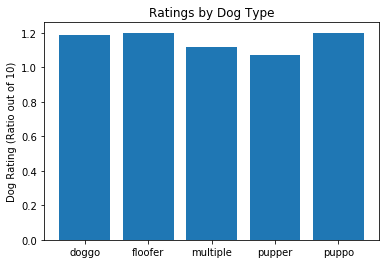

In [161]:
# Plot the findings
plt.bar(dog_types, scores);
plt.title('Ratings by Dog Type')
plt.ylabel('Dog Rating (Ratio out of 10)');

The ratings are awfully similar, though floofer dog types just edge out the competition. Puppers are noticably lower. If we had more time, we could see if the difference was statistically significant.

#### Insight #4:
Let's see which pictures (p1 column) where p1_dog is TRUE have the highest confidence rating (p1_conf); in other words, which dog breeds is the neural network best at spotting?

In [154]:
# Code:
# only consider tweets where the image prediction was confident in seeing a dog
master_dogs = master_clean.query("p1_dog == True");
# average the confidence ratio for each dog breed; sort the list
dogConfSorted = master_dogs.groupby('p1', as_index=False)['p1_conf'].mean().sort_values('p1_conf', ascending=False);
dogConfSorted.reset_index(inplace=True)
dogConfSorted.head()

,index,p1,p1_conf
0,91,komondor,0.972531
1,80,clumber,0.946718
2,12,Brittany_spaniel,0.874545
3,89,keeshond,0.844431
4,77,bull_mastiff,0.815618


Looks like the neural network performs best with pictures of komondor dogs and worst with pics where the suspected dog is not the focal point or there are other objects in the picture. This makes sense given that the neural network searches for patterns pixel by pixel. The komondors have such an unmistakable coat! I cover this more in depth in my written report.

I attempted to make the below chart more visually appealing by removing a few of the dog breeds so they aren't all squeezed in on x-axis, but I encountered NaNs showing up anyway. Looks like pandas has issues here: https://stackoverflow.com/questions/53399022/pandas-plot-bar-without-nan-values-spaces. In lieu of time involved to fix this, I'll chock this up as an enhancement for the future and call out that the x-axis labelling could be cleaned up further.

In [150]:
# Attempt at making the dog breed x-axis more readable
dogsReadable = dogConfSorted.p1
dogsReadable.replace(to_replace=dogsReadable.iloc[1::2], value=np.nan, inplace=True)
dogConfSorted['dogsReadable'] = dogsReadable

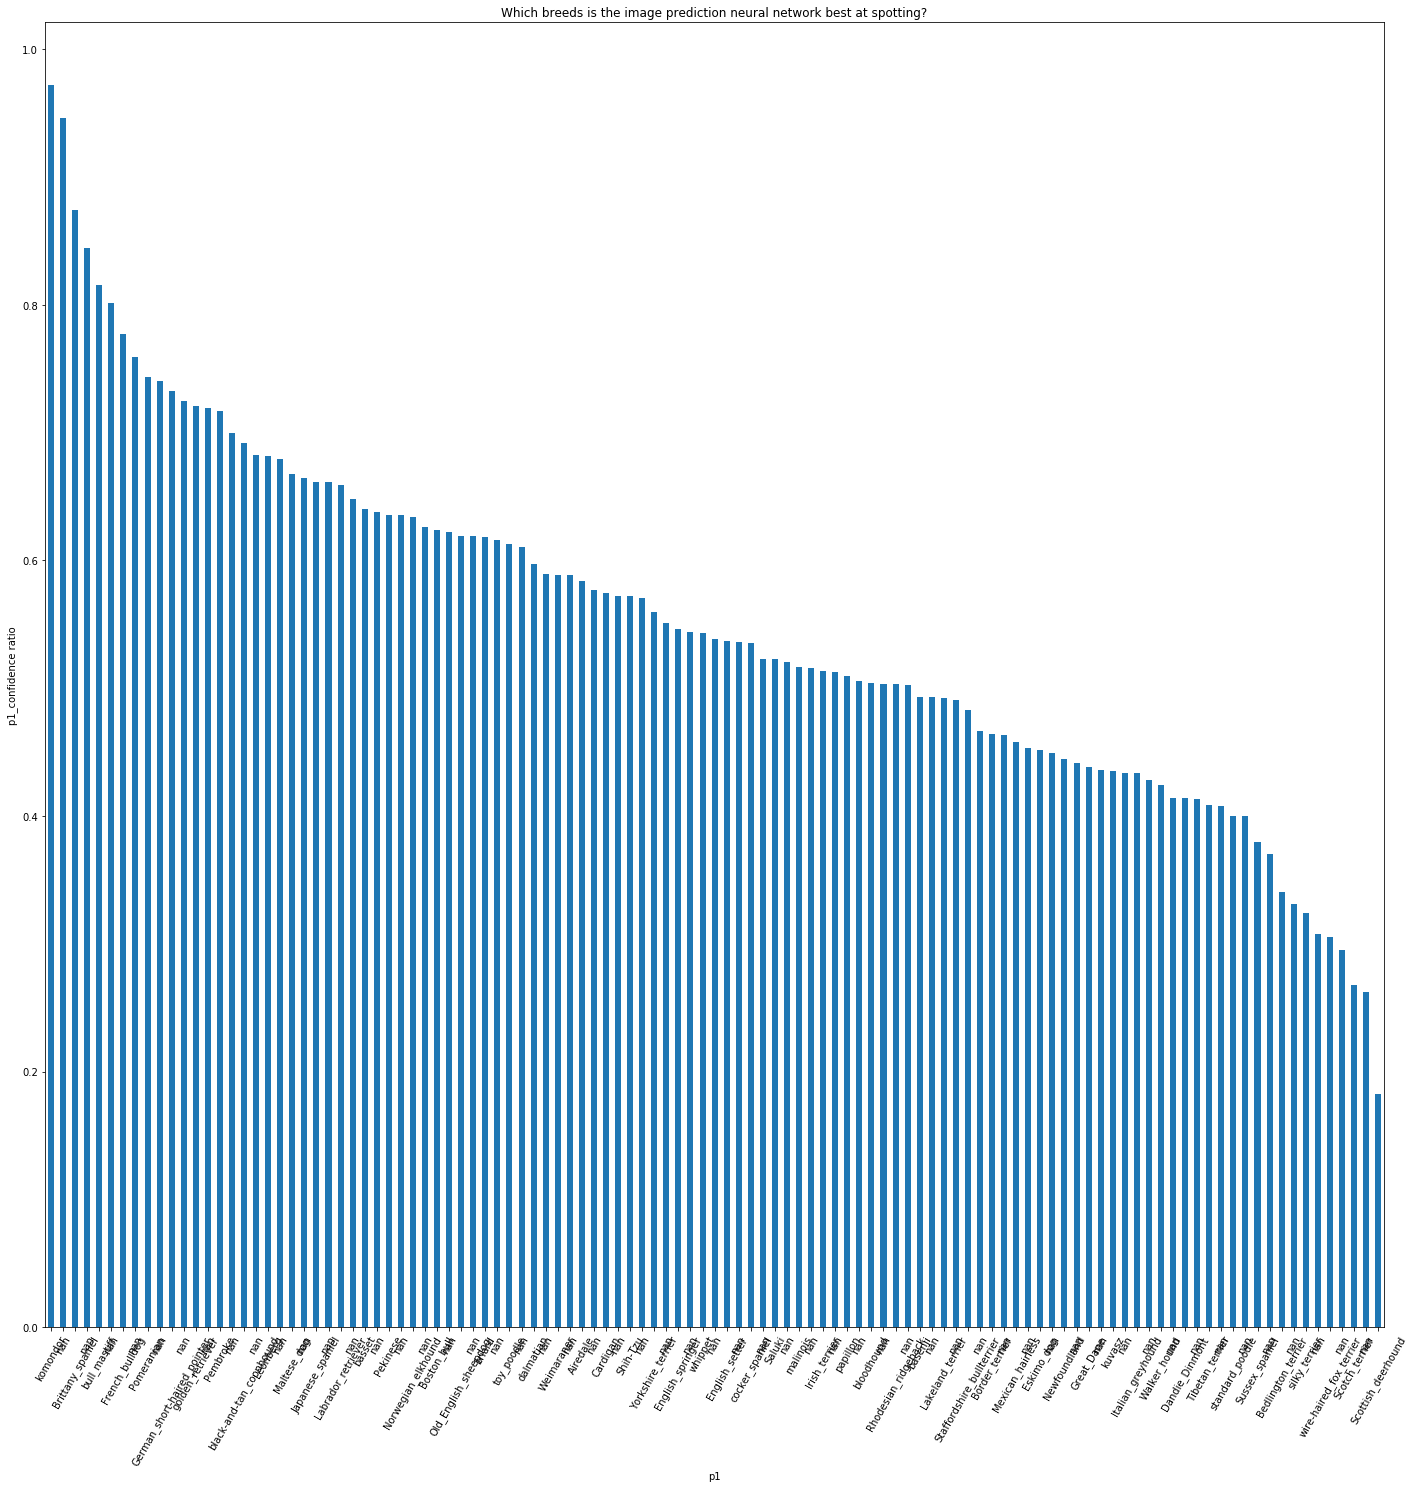

In [151]:
ax = dogConfSorted.plot.bar(x='p1', y='p1_conf', figsize=(24,24), legend=False, title='Which breeds is the image prediction neural network best at spotting?');
ax.set_xticks(dogConfSorted.index);
ax.set_ylabel('p1_confidence ratio');
ax.set_xticklabels(dogConfSorted.dogsReadable, rotation=60);
ax